In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
def classify(modelFileNAme, dataFileName):
    features = pd.read_csv(dataFileName)
    X = features[['is_verified', 'friends_count', 
                               'friends_growth_rate','favourites_count', 
                               'favourites_growth_rate', 'user_age',
                               'followers_count', 'listed_count', 
                               'followers_growth_rate', 'followers_friends_ratio']]
    with open(modelFileNAme, 'rb') as f:
        model = pickle.load(f)
    predictions = model.predict(X)
    return predictions

In [3]:
predictions = classify('model_searched.pkl', 'features_test.csv')

In [4]:
# For classification report if needed
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score, recall_score, precision_score
from sklearn.metrics import classification_report

In [5]:
y_test = pd.read_csv('classes_test.csv')
y_test = list(y_test['is_bot'])

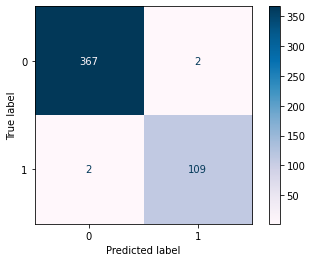

In [6]:
conf_matrix = confusion_matrix(y_test, predictions)
ConfusionMatrixDisplay(confusion_matrix=conf_matrix).plot(cmap='PuBu')

In [7]:
print(classification_report(y_test, predictions))
print("F1-score: ", f1_score(y_test, predictions))
print("Recall: ", recall_score(y_test, predictions))
print("Precision: ", precision_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       369
           1       0.98      0.98      0.98       111

    accuracy                           0.99       480
   macro avg       0.99      0.99      0.99       480
weighted avg       0.99      0.99      0.99       480

F1-score:  0.9819819819819819
Recall:  0.9819819819819819
Precision:  0.9819819819819819
